In [3]:
import numpy as np
from math import sqrt
from skimage.transform import resize
import sys
import cv2
import numpy as np
import cv2
import glob
import pandas as pd
import random
from tqdm import tqdm
from matplotlib.image import imsave
import mahotas as mh
import pandas as pd
from scipy import ndimage
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from itertools import islice
from IPython.display import display_html
from statsmodels.regression.linear_model import OLS as lm
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white", {'axes.grid' : False})
%matplotlib inline
sns.set_style("white")
from scipy import stats
from scipy.stats import ttest_ind as ttest


random.seed(1337)

/apps/well/python/3.5.2-gcc5.4.0/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [15]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


In [16]:
def predict_areas(input_img,mu=False,no=False):
    input_img = cv2.imread(input_img,0)
    labels, no_objects = ndimage.label(input_img)
    props=regionprops(labels) 
    size={i:props[i].area for i in range (0, no_objects)}
    areas=[float(i) * (0.4942**2) for i in size.values() if float(i) * (0.4942**2) >= 200 and float(i) * (0.4942**2) <= 16000]
    no_of_cells=len(areas)
    if mu and no:
        return(areas,np.mean(areas),no_of_cells)
    elif mu:
        return(areas,np.mean(areas))
    else:
        return(areas)

In [17]:
def plot_me(img_list,x=5,y=5):
    plt.rcParams["font.family"] = "DejaVu Sans"
    i = 1
    fig = plt.figure(figsize=(15,20))
    for r in img_list:
        ax = fig.add_subplot(x,y,i)
        ax.grid(b="off")
        i+=1
        plt.imshow(plt.imread(r))
        plt.title('%s'%r.split('/')[2].split('_')[3])

In [18]:
import pandas as pd

test_tiles=pd.read_csv('adipoTiles.labeled.csv')
test_tiles.head()


,image,empty,not_adipocyte,adipocyte,sampleID
0,0-10240_GTEX-13QJC_Adipose-Subcutaneous.jpg,0.002056,0.000137,0.997807,GTEX-13QJC
1,0-10240_GTEX-RWSA_Adipose-Subcutaneous.jpg,0.072163,0.005093,0.922744,GTEX-RWSA
2,0-11264_GTEX-13QJC_Adipose-Subcutaneous.jpg,0.001999,0.001127,0.996874,GTEX-13QJC
3,0-11264_GTEX-RWSA_Adipose-Subcutaneous.jpg,0.000227,0.000176,0.999597,GTEX-RWSA
4,0-12288_GTEX-13QJC_Adipose-Subcutaneous.jpg,0.000577,0.000240,0.999183,GTEX-13QJC


In [19]:
adipocyte_tiles = test_tiles[test_tiles['sampleID'] != 'ImageCollection'].reset_index()
len(adipocyte_tiles)

456901

In [20]:
adipocyte_tiles['depot'] = [x.split('_')[2].split('.')[0] for x in adipocyte_tiles['image']]

In [21]:
seg_masks = sorted(glob.glob('predicted_masks/GTEX/*.png'))
seg_masks[0:5]

['predicted_masks/GTEX/Pred_Mask_0-10240_GTEX-13QJC_Adipose-Subcutaneous.png',
 'predicted_masks/GTEX/Pred_Mask_0-10240_GTEX-RWSA_Adipose-Subcutaneous.png',
 'predicted_masks/GTEX/Pred_Mask_0-11264_GTEX-13QJC_Adipose-Subcutaneous.png',
 'predicted_masks/GTEX/Pred_Mask_0-11264_GTEX-RWSA_Adipose-Subcutaneous.png',
 'predicted_masks/GTEX/Pred_Mask_0-12288_GTEX-13QJC_Adipose-Subcutaneous.png']

In [22]:
len(seg_masks)

380795

In [10]:
seg_masks_filenm = [x.split('/')[2].split('Pred_Mask_')[1].split('.')[0]+'.jpg' for x in seg_masks]

In [10]:
adipocyte_tiles_filtered = pd.DataFrame()
tiles = adipocyte_tiles['image'].tolist()

for i,entry in tqdm(enumerate(tiles)):
    if entry in seg_masks_filenm:
        adipocyte_tiles_filtered = adipocyte_tiles_filtered.append(adipocyte_tiles.loc[i])

456901it [6:24:20,  9.03it/s]


In [12]:
#adipocyte_tiles_filtered.to_csv('filtered_adipocyte_tiles.csv')

In [23]:
# START FROM HERE:
adipocyte_tiles_filtered = pd.read_csv('filtered_adipocyte_tiles.csv')

In [24]:
len(adipocyte_tiles_filtered),len(seg_masks)

(380795, 380795)

In [25]:
test_tiles_filtered = pd.DataFrame()

In [26]:
fat_tiles = adipocyte_tiles['image'].tolist()

In [21]:
for i in tqdm(seg_masks):
    if i.split('/')[2].split('Pred_Mask_')[1].split('.')[0]+'.jpg' in fat_tiles:
        test_tiles_filtered = test_tiles_filtered.append(adipocyte_tiles.loc[adipocyte_tiles['image'] == i.split('/')[2].split('Pred_Mask_')[1].split('.')[0]+'.jpg'])



100%|██████████| 384476/384476 [6:50:23<00:00,  9.88it/s]  


In [16]:
#np.save('gtex_test_tiles_filtered',test_tiles_filtered)

In [27]:
test_tiles = np.load('gtex_test_tiles_filtered.npy')

In [28]:
#test_tiles = test_tiles_filtered

In [29]:
len(test_tiles),len(adipocyte_tiles_filtered)

(380795, 380795)

In [30]:
# example prediction

cell_areas,mu_area,no_cells = predict_areas(seg_masks[0],mu=True,no=True)

print('Average adipocyte area for this tile is {0:.1f}um and number of\
 cells present is {1:}'.format(mu_area,no_cells))


Average adipocyte area for this tile is 3802.1um and number of cells present is 51


example segmentation masks - majority are high quality. False segmentations such as background are filtered out - For some poor quality tiles (H&E dye failed) segmentations will also be bad - will assess suitable threshold.

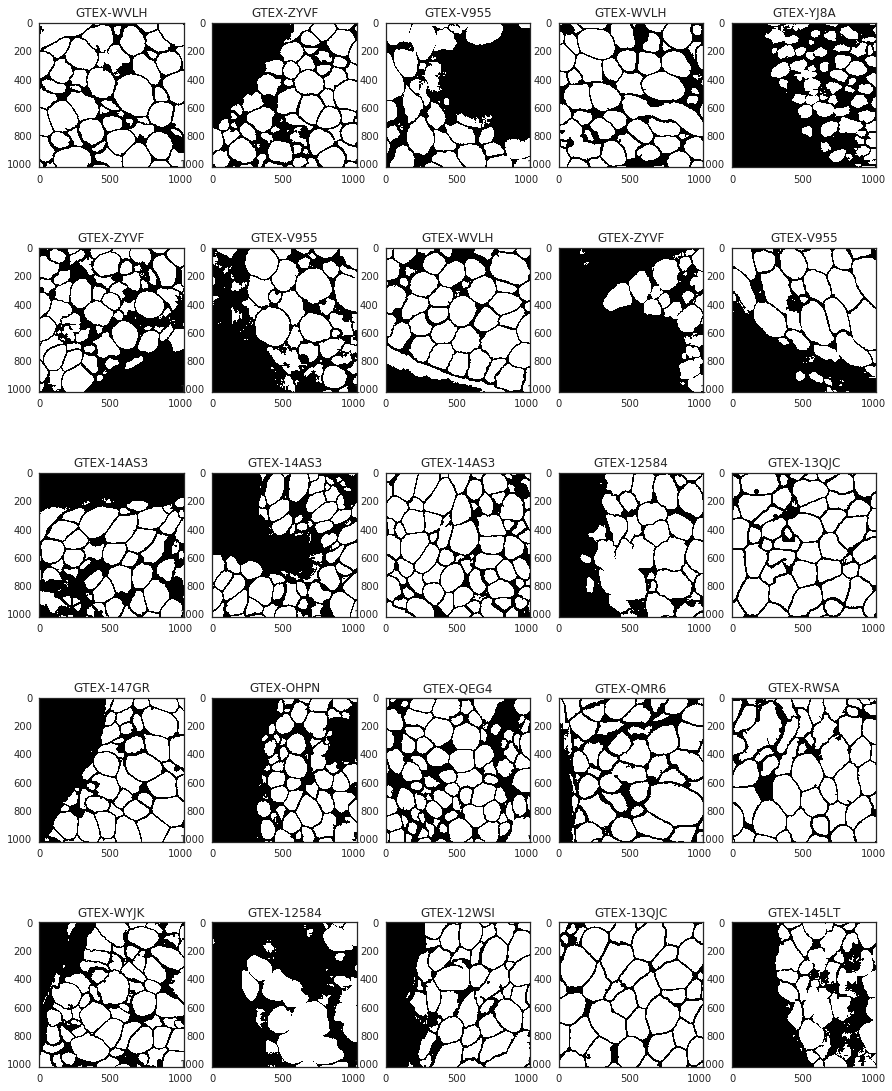

In [31]:
plot_me(seg_masks[25:50])

In [32]:
from tqdm import tqdm
len(seg_masks)

380795

In [24]:
#For each preproduced segmentation mask, calculate the area of all cells, the average and the count 
measurements = []
for i in tqdm(seg_masks):
    prd_means = predict_areas(i)
    # list of cell areas, followed by average area and count of cells.
    measurements.append(prd_means)


100%|██████████| 380795/380795 [4:20:52<00:00, 24.33it/s]  


In [25]:
measurements = np.array(measurements)
np.save('gtex_measurements.npy',measurements)

In [33]:
# run the above cell previously, so we'll load in the data now.
measurements = np.load('gtex_measurements.npy')

In [34]:
len(measurements)

380795

QC step:
Find all the tiles that have a cell count less than 20 ( Visually, many of these low count segmentations don't look great)


In [35]:
# Adipocyte tiles, their masks and measurements should have the same length and are in the same order
len(adipocyte_tiles_filtered),len(seg_masks),len(measurements)


(380795, 380795, 380795)

In [36]:
# filter out the 1500 seg masks that have counts under 20 (0.63% of all masks)
adipo_tiles_filt=adipocyte_tiles_filtered
seg_masks_filt = seg_masks
measurements_filt = measurements

adipo_tiles_filt = adipo_tiles_filt.reset_index(drop=True)

In [37]:
len(seg_masks_filt),len(measurements_filt),len(adipo_tiles_filt)

(380795, 380795, 380795)

In [38]:
print('Total number of cells measured in experiment: {}'.format(sum([len(a) for a in measurements_filt])))

Total number of cells measured in experiment: 21208145


In [39]:
#get the indices of visceral and subq samples respectively.
#subset all the data
len(adipo_tiles_filt)

380795

In [64]:
# create list of indexes that seperate subcutaneous from visceral tiles.
subq_tiles_filt = adipo_tiles_filt[adipo_tiles_filt['depot'] == 'Adipose-Subcutaneous'].index.tolist()
visceral_tiles_filt = adipo_tiles_filt[adipo_tiles_filt['depot'] == 'Visceral-Omentum'].index.tolist()

In [65]:
print('subq: {}, visceral: {}, total tiles: {}'.format(len(subq_tiles_filt),len(visceral_tiles_filt),len(visceral_tiles_filt)+len(subq_tiles_filt)))

subq: 206113, visceral: 174682, total tiles: 380795


In [66]:
from operator import itemgetter
# obtain subq and visceral measurements
subq_measurements_filt = itemgetter(*subq_tiles_filt)(measurements_filt)
visceral_measurements_filt = itemgetter(*visceral_tiles_filt)(measurements_filt)

subq_seg_masks_filt=itemgetter(*subq_tiles_filt)(seg_masks_filt)
visceral_seg_masks_filt=itemgetter(*visceral_tiles_filt)(seg_masks_filt)


In [67]:
subq_mean_areas = np.array([np.mean(i) for i in subq_measurements_filt])
visc_mean_areas = np.array([np.mean(i) for i in visceral_measurements_filt])


In [68]:
subq_areas = pd.DataFrame(
    {'mean_areas': subq_mean_areas,
     'tissue': np.repeat('Subcutaneous',len(subq_mean_areas))
    })

visc_areas = pd.DataFrame(
    {'mean_areas': visc_mean_areas,
     'tissue': np.repeat('Visceral',len(visc_mean_areas))
    })

In [69]:
all_areas=pd.concat([subq_areas,visc_areas])
all_areas.head()

,mean_areas,tissue
0,3802.138319,Subcutaneous
1,3961.617661,Subcutaneous
2,3588.123961,Subcutaneous
3,4520.173088,Subcutaneous
4,3801.636815,Subcutaneous


[Text(0, 0.5, 'Mean Adipocyte area'), Text(0.5, 0, 'Adipose Depot')]

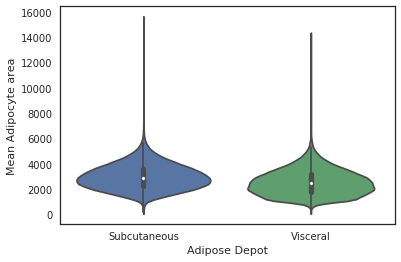

In [70]:
ax=sns.violinplot(y='mean_areas',x='tissue',data=all_areas)
# ax=sns.swarmplot(y='mean_areas',x='tissue',data=all_areas,color='.25',alpha=0.3) too many data points
ax.set(ylabel='Mean Adipocyte area', xlabel='Adipose Depot')



In [71]:
print('Clear difference in means between depots:-\nSubq: {0:.2f} +/- {1:.2f} \nVisceral:\
 {2:.2f} +/- {3:.2f}'.format(np.nanmean(subq_mean_areas),np.nanstd(subq_mean_areas),
                             np.nanmean(visc_mean_areas),np.nanstd(visc_mean_areas)))

#ttest(subq_mean_areas,visc_mean_areas,equal_var=False)

Clear difference in means between depots:-
Subq: 2973.33 +/- 978.16 
Visceral: 2526.92 +/- 989.24


**Now, we need to operate at the individual sample level. So we will create a dictionary {GTEX_ID}: [areas]**

In [72]:
# subq_measurements_filt visceral_measurements_filt

from collections import defaultdict

subq_samples=defaultdict(list)
visc_samples=defaultdict(list)


In [73]:
# Some Subq samples have no tiles after this filtering.
for i,a in enumerate(subq_measurements_filt):
    gtex_id = subq_seg_masks_filt[i].split('_')[4]
    try:
        if len(subq_measurements_filt[i]) == 0:
            next
        else:
            subq_samples[gtex_id].append(subq_measurements_filt[i])
    except KeyError:
        if len(subq_measurements_filt[i]) == 0:
            next
        else:
            subq_samples[gtex_id] = subq_measurements_filt[i]
        
    

In [74]:
# tmp variable is a test, we know that GTEX-1GF9V should have 664 tiles as shown earlier in the notebook
tmp=[]
for i,a in enumerate(visceral_measurements_filt):
    gtex_id = visceral_seg_masks_filt[i].split('_')[4]
    try:
        if gtex_id =='GTEX-1GF9V':
            tmp.append(visceral_seg_masks_filt[i])
        visc_samples[gtex_id].append(visceral_measurements_filt[i])
    except KeyError:
        if gtex_id =='GTEX-1GF9V':
            tmp = [(visceral_seg_masks_filt[i])]
        visc_samples[gtex_id] = visceral_measurements_filt[i]
    

In [75]:
example_id = [item for sublist in visc_samples['GTEX-1GF9V'] for item in sublist]
print('GTEX-1GF9V has {} tiles containing {} unique adipocyte measurements'.format(len(visc_samples['GTEX-1GF9V']),len(example_id)))

GTEX-1GF9V has 703 tiles containing 39539 unique adipocyte measurements


In [76]:
# lets set a seed and do some random sampling. We want to assess how the variance changes for adipocyte
# area estimates when measuring 3, 10, 100, 500 and 1000 cells.
# A previous pulication suggests it's 100.

np.random.seed(1337)
def simulate_cells(n,data,mean=True):
    sub=[]
    for i in range(100):
        if mean == True:
            sub.append(statistics.mean(np.random.choice(data,n)))
        else:
            sub.append(statistics.stdev(np.random.choice(data,n)))
    return (sub)
    

In [77]:
three = simulate_cells(n=3,data=example_id)
ten = simulate_cells(n=10,data=example_id)
hundred = simulate_cells(n=100,data=example_id)
fivehundred = simulate_cells(n=500,data=example_id)
thousand = simulate_cells(n=1000,data=example_id)

In [78]:
simulation = pd.DataFrame(
    {'1000': thousand,
     '500': fivehundred,
     '100': hundred,
     '10':ten,
     '3': three
    })

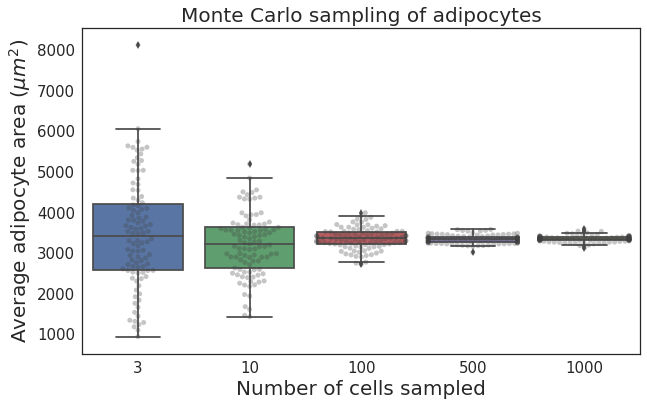

In [132]:
plt.figure(figsize=(10,6))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
sns.set_style("white")
ax = sns.boxplot(data=simulation,order=['3','10','100','500','1000'])
ax = sns.swarmplot(data=simulation, color=".25",order=['3','10','100','500','1000'],alpha=.3)
plt.xlabel('Number of cells sampled',fontsize=20)
plt.ylabel('Average adipocyte area ($\mu m^{2}$)',fontsize=20)
plt.title('Monte Carlo sampling of adipocytes',fontsize=20)
plt.savefig('mc_sampling_GTEX.pdf')

**Lets assess how many cells we have measured per sample (on average)**

In [80]:
subq_no_cells_per_sample=[]
for key,value in subq_samples.items():
    subq_no_cells_per_sample.append(len([item for sublist in subq_samples[key] for item in sublist]))

visc_no_cells_per_sample=[]
for key,value in visc_samples.items():
    visc_no_cells_per_sample.append(len([item for sublist in visc_samples[key] for item in sublist]))


In [81]:
subq_no_tiles_per_sample=[]
for key,value in subq_samples.items():
    subq_no_tiles_per_sample.append(len([item for item in subq_samples[key]]))

visc_no_tiles_per_sample=[]
for key,value in visc_samples.items():
    visc_no_tiles_per_sample.append(len([item for item in visc_samples[key]]))



In [82]:
print('Subcutaneous histology samples on average have {0:.0f} cells measured'.format(np.mean(subq_no_cells_per_sample)))

Subcutaneous histology samples on average have 14113 cells measured


In [83]:
print('Visceral fat histology samples on average have {0:.0f} cells measured'.format(np.mean(visc_no_cells_per_sample)))

Visceral fat histology samples on average have 19527 cells measured


In [84]:
# return the key value at the nth position in a dictionary
def ix(dic, n): 
   try:
       return list(dic)[n]
   except IndexError:
       print('not enough keys')

In [85]:
#which sample has the lowest number of adipocytes counted?
ix(dic=subq_samples,n=np.argmin(subq_no_cells_per_sample))

'GTEX-13OVI'

In [86]:
#which sample has the highest number of adipocytes counted?
ix(dic=subq_samples,n=np.argmax(subq_no_cells_per_sample))

'GTEX-RN5K'

In [87]:
# plot subcutaneous and visceral cell distributions on a single plot.
# calculate adipocyte area mean and variance.

In [88]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [89]:
len(subq_samples),len(visc_samples)

(721, 565)

**Lets plot the adipocyte area distributions for all cells across all samples:**

Text(0.5, 1.0, 'Visceral')

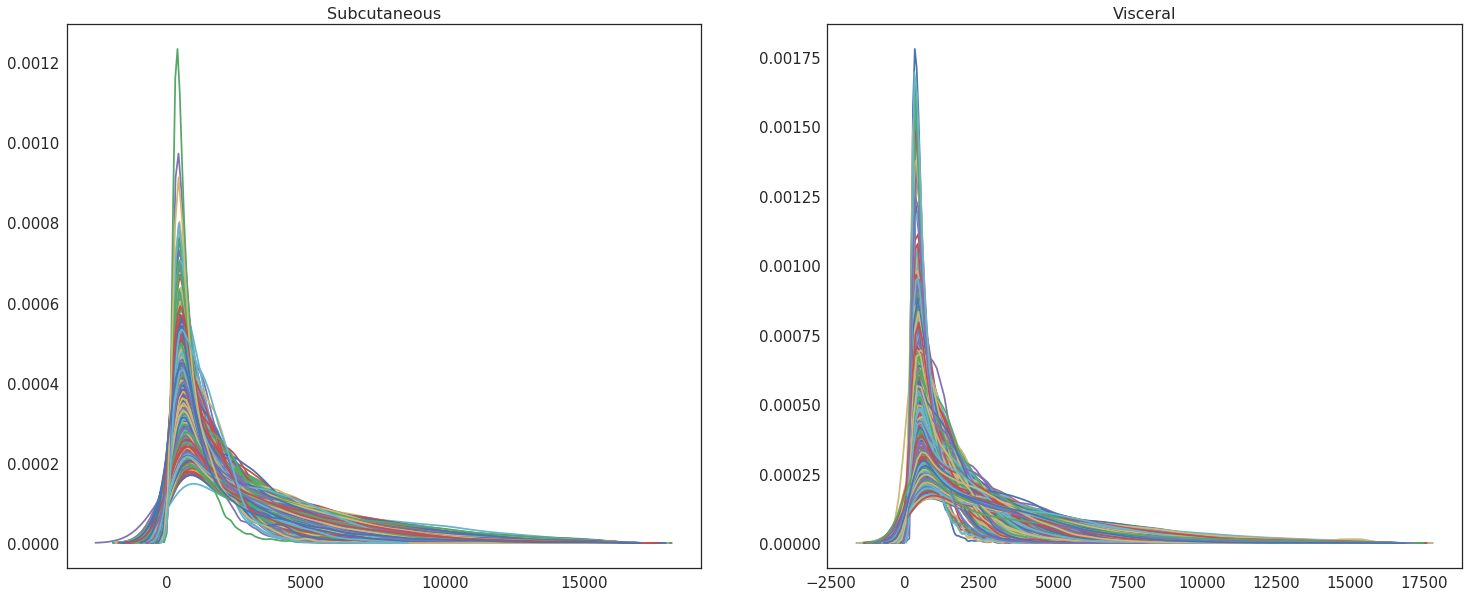

In [90]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
for key,value in take(721, subq_samples.items()):
    sns.distplot([item for sublist in value for item in sublist],hist=False)
plt.title('Subcutaneous',size=16)

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
for key,value in take(565, visc_samples.items()):
    sns.distplot([item for sublist in value for item in sublist],hist=False)
plt.title('Visceral',size=16)



**We will randomly select 500 cells from each sample to measure.**

In [91]:

subq_sample_areas={}
visc_sample_areas={}

for key,value in subq_samples.items():
    tmp = [item for sublist in value for item in sublist]
    tmp = [x for x in tmp if x <= 30000]
    if len(tmp) >=500:
        selection = np.random.choice(tmp,500)
        small_std = np.mean(tmp) - np.std(tmp)
        large_std = np.mean(tmp) + np.std(tmp)
        small = sum([a < small_std for a in selection])
        large = sum([a > large_std for a in selection])
        ratio_s = small/(large+small)
        
        subq_sample_areas[key] = np.mean(selection),np.std(selection),ratio_s
    else:
        next

for key,value in visc_samples.items():
    tmp = [item for sublist in value for item in sublist]
    tmp = [x for x in tmp if x <= 30000]
    if len(tmp) >=500:
        selection = np.random.choice(tmp,500)
        small_std = np.mean(tmp) - np.std(tmp)
        large_std = np.mean(tmp) + np.std(tmp)
        small = sum([a < small_std for a in selection])
        large = sum([a > large_std for a in selection])
        ratio_v = small/(large+small)
        visc_sample_areas[key] = np.mean(selection),np.std(selection),ratio_v
    else:
        next

In [92]:
for i,v in take(10,subq_sample_areas.items()):
    print(i,v)

GTEX-183FY (2292.1034033632, 2006.9914325000857, 0.39814814814814814)
GTEX-XQ8I (2940.0879775909593, 2544.6220479024, 0.18446601941747573)
GTEX-ZGAY (3231.3238931416795, 2581.3234062121646, 0.47794117647058826)
GTEX-OXRK (3845.0581186303993, 3338.6825538135636, 0.304)
GTEX-12WSG (3815.3549118008796, 3087.8466361644273, 0.5)
GTEX-NPJ8 (2545.13091980504, 2629.2205328630366, 0.0)
GTEX-12ZZX (2896.0414175515198, 2213.521265438111, 0.4585987261146497)
GTEX-YB5K (2315.18494774504, 2573.622835660493, 0.0)
GTEX-Y5LM (2346.8517930401595, 2082.166451354238, 0.11688311688311688)
GTEX-WHWD (1846.6300364142398, 1558.3968207204048, 0.13186813186813187)


In [93]:
print('No of samples with 500 adipocyte areas estimated -\nSubcutaneous: {}\nVisceral: {}'.format(len(subq_sample_areas),len(visc_sample_areas)))

No of samples with 500 adipocyte areas estimated -
Subcutaneous: 718
Visceral: 563


In [94]:
# lets convert the dictionaries into dataframes so we can add and analyse additional covariates
subq_sample_area_df = pd.DataFrame(subq_sample_areas).T.rename_axis('sampleID').add_prefix('Area').reset_index()
subq_sample_area_df.columns = ['SUBJID', 'mu_area','var_area','per_small_cells']

visc_sample_area_df = pd.DataFrame(visc_sample_areas).T.rename_axis('sampleID').add_prefix('Area').reset_index()
visc_sample_area_df.columns = ['SUBJID', 'mu_area','var_area','per_small_cells']

In [95]:
# lets have a quick look at both the subQ and visc tables so far:
display_side_by_side(subq_sample_area_df.head(), visc_sample_area_df.head())


,SUBJID,mu_area,var_area,per_small_cells
0,GTEX-1117F,1501.115637,1512.865818,0.000000
1,GTEX-111CU,2764.714059,2545.559073,0.144444
2,GTEX-111FC,2445.325820,2335.684686,0.000000
3,GTEX-111VG,4393.200958,3622.707865,0.421053
4,GTEX-111YS,3374.628958,3156.849369,0.355932
,SUBJID,mu_area,var_area,per_small_cells
0,GTEX-1117F,824.032090,715.373418,0.000000
1,GTEX-111CU,3364.226559,2742.041179,0.320312
2,GTEX-111VG,3403.484186,2944.060749,0.444444
3,GTEX-111YS,3362.451958,2703.805217,0.467105


Lets look at the distribution of mean adipocyte area across samples:

(0, 0.0006)

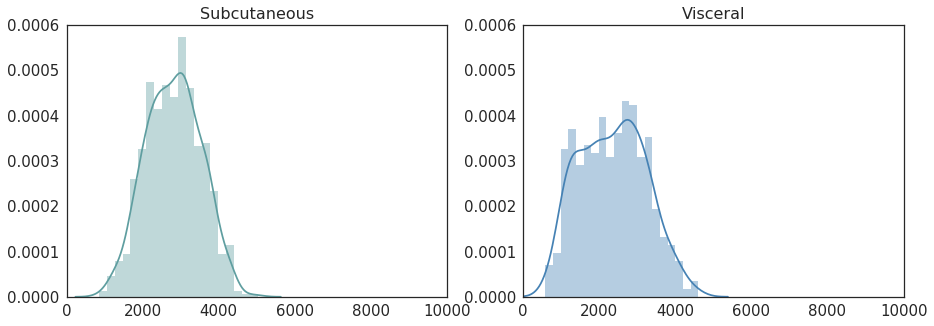

In [96]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.distplot(np.array(subq_sample_area_df['mu_area'].tolist()),color='cadetblue',bins=20)
plt.title('Subcutaneous',size=16)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.0006)

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.distplot(np.array(visc_sample_area_df['mu_area'].tolist()),color='steelblue',bins=20)
plt.title('Visceral',size=16)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.0006)GT



**Visceral fat tends to be slightly bimodal - Two adipocyte populations (amongst individuals) large and small**

Text(0.5, 1.0, 'Visceral')

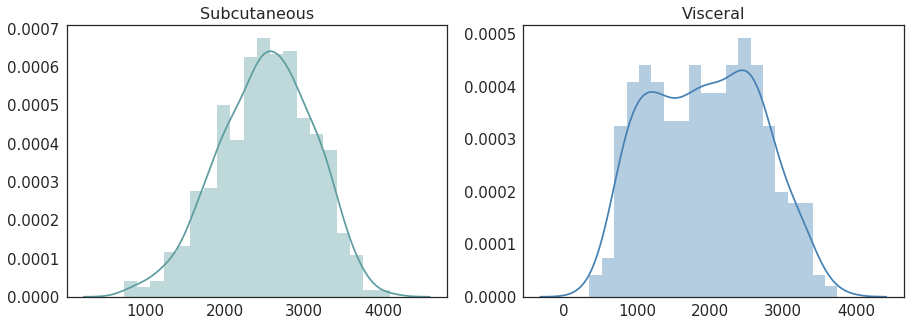

In [97]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.distplot(np.array(subq_sample_area_df['var_area'].tolist()),color='cadetblue',bins=20)
plt.title('Subcutaneous',size=20)
plt.xlabel('Mean Adipocyte Area ($\mu m^{2}$)')
plt.ylabel('Density')

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.distplot(np.array(visc_sample_area_df['var_area'].tolist()),color='steelblue',bins=20)
plt.title('Visceral',size=16)
plt.xlabel('Mean Adipocyte Area ($\mu m^{2}$)')
plt.title('Visceral',size=20)



# sns.plt.xlim(0,10000)
# sns.plt.ylim(0,0.0006)

In [98]:
# fig = plt.figure(figsize=(15,5))
# ax = fig.add_subplot(1,2,1)
# ax.grid(b="off")
# sns.distplot(np.array(subq_sample_area_df['per_small_cells'].tolist()),color='cadetblue',bins=20)
# plt.title('Subcutaneous',size=16)
# # sns.plt.xlim(0,10000)
# # sns.plt.ylim(0,0.0006)

# ax = fig.add_subplot(1,2,2)
# ax.grid(b="off")
# sns.distplot(np.array(visc_sample_area_df['per_small_cells'].tolist()),color='steelblue',bins=20)
# plt.title('Visceral',size=16)
# # sns.plt.xlim(0,10000)
# # sns.plt.ylim(0,0.0006)

In [99]:
test_stats=ttest(np.array(visc_sample_area_df['mu_area'].tolist()),np.array(subq_sample_area_df['mu_area'].tolist()),equal_var=False)

print('T-stastistic is: {0:.3f} with P-value = {1}'.format(test_stats[0],test_stats[1]))

T-stastistic is: -10.170 with P-value = 2.886396774394991e-23


In [100]:
print('The mean adipocyte areas are: \nSubcutaneous: {0:.2f}\nVisceral: {1:.2f}'.format(np.mean(subq_sample_area_df['mu_area']),np.mean(visc_sample_area_df['mu_area'])))

The mean adipocyte areas are: 
Subcutaneous: 2813.12
Visceral: 2352.23


In [101]:
np.std(subq_sample_area_df['mu_area']),np.std(visc_sample_area_df['mu_area'])

(717.3644182721061, 866.5665877091184)

**Lets load in the GTEx sample and phenotype attributes, expand table with potentially relevant variables:**

In [1]:
import pandas as pd
phenotypes = pd.read_csv('../GTEx_Analysis_2016-01-15_v7_SubjectPhenotypesDS.txt',delimiter='\t')

In [2]:
# subq_pheno_merged = pd.read_csv('final_cohort_measurements/GTEx_Subcutaneous_areas.csv')
# visc_pheno_merged = pd.read_csv('final_cohort_measurements/GTEx_Visceral_areas.csv')

In [103]:
subq_pheno_merged=pd.merge(subq_sample_area_df,phenotypes,left_on='SUBJID', right_on='SUBJID')
visc_pheno_merged=pd.merge(visc_sample_area_df,phenotypes,left_on='SUBJID', right_on='SUBJID')

In [104]:
len(subq_pheno_merged),len(visc_pheno_merged)

(715, 562)

In [105]:
subq_pheno_merged.head()

,SUBJID,mu_area,var_area,per_small_cells,COHORT,SEX,AGE,RACE,ETHNCTY,HGHT,...,MHTXCEXP,MHUK8096,MHUREMIA,MHWKNSSU,MHWNVCT,MHWNVHX,MHWTLSUA,MHWTLSUB,DTHSEASON,DTHTIME
0,GTEX-1117F,1501.115637,1512.865818,0.000000,Postmortem,2,66,2,0,66.0,...,0,0,0,0,0,0.0,0,0,Spring,20:20
1,GTEX-111CU,2764.714059,2545.559073,0.144444,Organ Donor (OPO),1,57,3,0,70.0,...,0,0,0,0,0,0.0,0,0,Spring,08:01
2,GTEX-111FC,2445.325820,2335.684686,0.000000,Postmortem,1,61,3,0,73.0,...,0,0,0,0,0,0.0,0,0,Spring,12:30
3,GTEX-111VG,4393.200958,3622.707865,0.421053,Postmortem,1,63,3,0,69.0,...,0,0,0,0,0,0.0,0,0,Spring,07:13
4,GTEX-111YS,3374.628958,3156.849369,0.355932,Organ Donor (OPO),1,62,3,0,72.0,...,0,0,0,0,0,0.0,0,0,Spring,01:21


In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression as lm_regress

Correlation between mean adipocyte area and BMI

In [6]:
pearsonr(visc_pheno_merged['mu_area'],visc_pheno_merged['BMI'])

(0.49822215671757536, 1.1752628740100287e-36)

In [7]:
pearsonr(subq_pheno_merged['mu_area'],subq_pheno_merged['BMI'])

(0.42894098704862266, 1.8648995670468125e-33)

(15, 40)

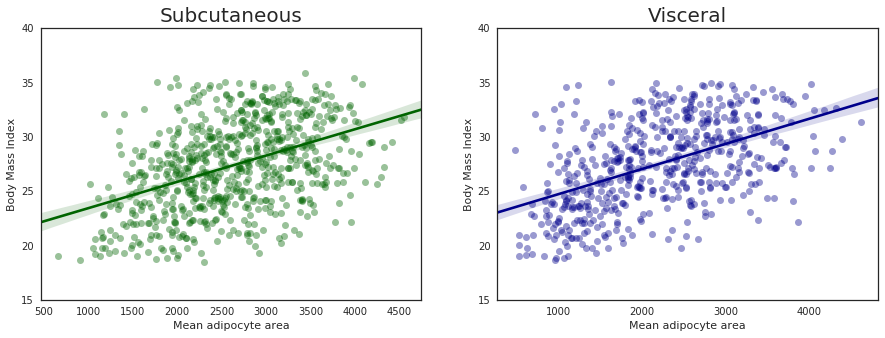

In [8]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.regplot(x=subq_pheno_merged['mu_area'],y=subq_pheno_merged['BMI'],color='darkgreen',scatter_kws={'alpha':0.4})
plt.title('Subcutaneous',size=20)
ax.set(xlabel="Mean adipocyte area", ylabel="Body Mass Index")
sns.plt.ylim(15,40)

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.regplot(x=visc_pheno_merged['mu_area'],y=visc_pheno_merged['BMI'],color='darkblue',scatter_kws={'alpha':0.4})
plt.title('Visceral',size=20)
ax.set(xlabel="Mean adipocyte area", ylabel="Body Mass Index",)
sns.plt.ylim(15,40)



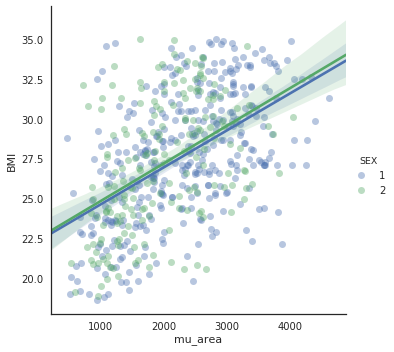

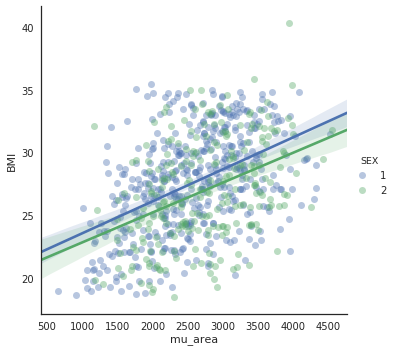

In [9]:
sns.lmplot(data=visc_pheno_merged, x='mu_area',y='BMI',scatter_kws={'alpha':0.4},hue='SEX')
sns.lmplot(data=subq_pheno_merged, x='mu_area',y='BMI',scatter_kws={'alpha':0.4},hue='SEX')



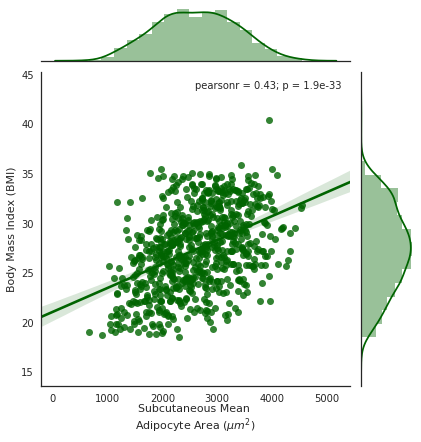

In [10]:
sns.jointplot(x=subq_pheno_merged['mu_area'],y=subq_pheno_merged['BMI'],color='darkgreen',kind='reg')
plt.xlabel('Subcutaneous Mean \nAdipocyte Area ($\mu m^{2}$)')
plt.ylabel('Body Mass Index (BMI)')
plt.savefig('gtex_bmi_subq.pdf')

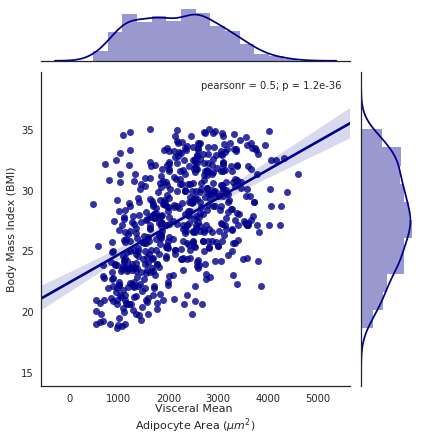

In [11]:
sns.jointplot(x=visc_pheno_merged['mu_area'],y=visc_pheno_merged['BMI'],color='darkblue',kind='reg')
plt.xlabel('Visceral Mean \nAdipocyte Area ($\mu m^{2}$)')
plt.ylabel('Body Mass Index (BMI)')
plt.savefig('gtex_bmi_visc.pdf')

In [12]:
def r_SE(x,n):
    return sqrt((float(1)-(x**2))/float(n -2))

**t-test for mean difference between males and females visceral and subcutaneous**

In [13]:
groupM = visc_pheno_merged.where(visc_pheno_merged['SEX']== 1)['mu_area'].dropna()
groupF = visc_pheno_merged.where(visc_pheno_merged['SEX']== 2)['mu_area'].dropna()


In [16]:
# mean area visc
ttest(groupM,groupF)

Ttest_indResult(statistic=4.691696324436426, pvalue=3.407960055472486e-06)

In [17]:
groupM = visc_pheno_merged.where(visc_pheno_merged['SEX']== 1)['var_area'].dropna()
groupF = visc_pheno_merged.where(visc_pheno_merged['SEX']== 2)['var_area'].dropna()


In [18]:
#area variances visc
ttest(groupM,groupF)

Ttest_indResult(statistic=4.445540429195264, pvalue=1.057054940807284e-05)

In [19]:
groupM = subq_pheno_merged.where(subq_pheno_merged['SEX']== 1)['mu_area'].dropna()
groupF = subq_pheno_merged.where(subq_pheno_merged['SEX']== 2)['mu_area'].dropna()

In [20]:
# mean area subq
ttest(groupM,groupF)

Ttest_indResult(statistic=-3.3130869861825003, pvalue=0.0009691803999037356)

In [21]:
groupM = subq_pheno_merged.where(subq_pheno_merged['SEX']== 1)['var_area'].dropna()
groupF = subq_pheno_merged.where(subq_pheno_merged['SEX']== 2)['var_area'].dropna()

In [22]:
# area variance subq
ttest(groupM,groupF)

Ttest_indResult(statistic=-3.237188327539582, pvalue=0.0012628371264126754)

In [23]:
subq_pheno_merged['depot'] = np.repeat('subcutaneous',len(subq_pheno_merged))

In [24]:
visc_pheno_merged['depot'] = np.repeat('visceral',len(visc_pheno_merged))

In [25]:
both_depot_pheno=pd.concat([subq_pheno_merged,visc_pheno_merged])


In [26]:
#both_depot_pheno['SEX']=both_depot_pheno['SEX'].astype('category')
#both_depot_pheno.SEX.replace([1, 2], ['XY', 'XX'], inplace=True)
both_depot_pheno=both_depot_pheno.rename(columns={'SEX': 'sex'})
both_depot_pheno.head()


,Unnamed: 0,SUBJID,mu_area,var_area,per_small_cells,COHORT,sex,AGE,RACE,ETHNCTY,...,MHUK8096,MHUREMIA,MHWKNSSU,MHWNVCT,MHWNVHX,MHWTLSUA,MHWTLSUB,DTHSEASON,DTHTIME,depot
0,0,GTEX-1117F,1170.359787,1435.141416,0.000000,Postmortem,2,66,2,0,...,0,0,0,0,0.0,0,0,Spring,20:20,subcutaneous
1,1,GTEX-111CU,2582.538721,2862.515091,0.000000,Organ Donor (OPO),1,57,3,0,...,0,0,0,0,0.0,0,0,Spring,08:01,subcutaneous
2,2,GTEX-111FC,2177.668220,2595.775287,0.000000,Postmortem,1,61,3,0,...,0,0,0,0,0.0,0,0,Spring,12:30,subcutaneous
3,3,GTEX-111VG,4176.148568,4003.381588,0.169643,Postmortem,1,63,3,0,...,0,0,0,0,0.0,0,0,Spring,07:13,subcutaneous
4,4,GTEX-111YS,3292.806293,3448.617179,0.000000,Organ Donor (OPO),1,62,3,0,...,0,0,0,0,0.0,0,0,Spring,01:21,subcutaneous


In [27]:
len(both_depot_pheno)

1280

How many XY and XX?

In [28]:
both_depot_pheno.head()

both_depot_pheno.groupby(['sex']).count()

,Unnamed: 0,SUBJID,mu_area,var_area,per_small_cells,COHORT,AGE,RACE,ETHNCTY,HGHT,...,MHUK8096,MHUREMIA,MHWKNSSU,MHWNVCT,MHWNVHX,MHWTLSUA,MHWTLSUB,DTHSEASON,DTHTIME,depot
sex,,,,,,,,,,,,,,,,,,,,,
1,844,844,844,844,844,844,844,844,844,844,...,844,844,844,844,843,844,844,831,831,844
2,436,436,436,436,436,436,436,436,436,436,...,436,436,436,436,436,436,436,434,434,436


[Text(0, 0.5, 'Mean Adipocyte Area'), Text(0.5, 0, 'Adipose Depot')]

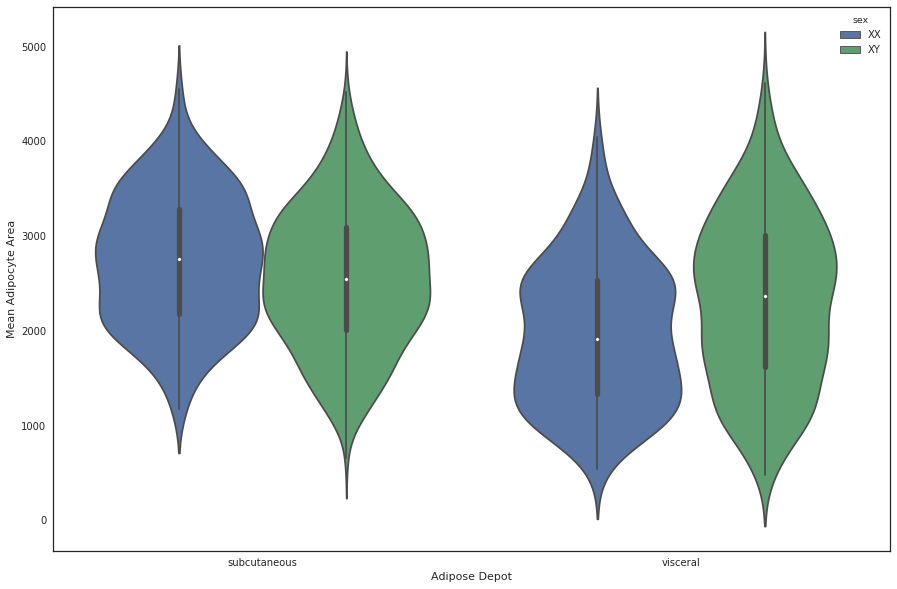

In [29]:
# by depot and sex
both_depot_pheno['sex']=both_depot_pheno['sex'].astype('str')
both_depot_pheno.sex.replace(['1', '2'],['XY', 'XX'], inplace=True)
both_depot_pheno.depot.replace([0, 1],['subcutaneous', 'visceral'], inplace=True)
fig = plt.figure(figsize=(15,10))
ax.grid(b="off")
ax=sns.violinplot(y='mu_area',x='depot',hue='sex',data=both_depot_pheno)
ax.set(xlabel="Adipose Depot", ylabel="Mean Adipocyte Area")


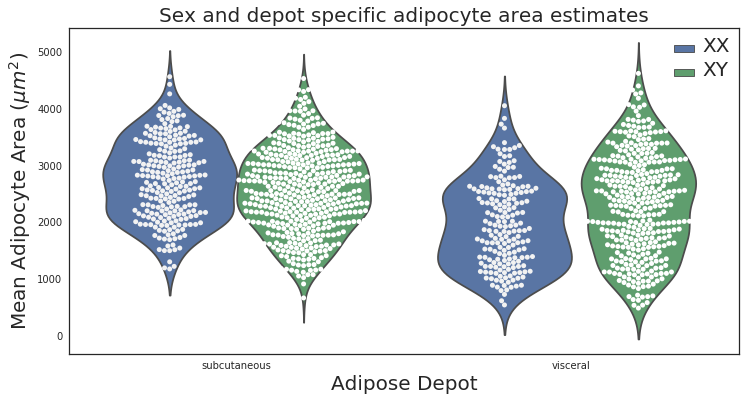

In [30]:
# # by depot and sex
fig = plt.figure(figsize=(12,6))
both_depot_pheno['sex']=both_depot_pheno['sex'].astype('str')
both_depot_pheno.sex.replace(['1', '2'],['XY', 'XX'], inplace=True)
# ax.grid(b="off")
ax=sns.violinplot(y='mu_area',x='depot',hue='sex',data=both_depot_pheno,inner=None)
ax = sns.swarmplot(x="depot", y="mu_area", hue="sex",
                     data=both_depot_pheno, split=True,color="white", edgecolor="gray")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.xlabel('Adipose Depot',fontsize='20') 
plt.ylabel("Mean Adipocyte Area ($\mu m^{2}$)",fontsize='20')
plt.title("Sex and depot specific adipocyte area estimates",fontsize='20')
plt.savefig('gtex_sex_depot.pdf')

In [31]:
# # by depot and sex
# # both_depot_pheno['sex']=both_depot_pheno['sex'].astype('str')
# # both_depot_pheno.sex.replace(['1', '2'],['XY', 'XX'], inplace=True)
# # both_depot_pheno.depot.replace([0, 1],['subcutaneous', 'visceral'], inplace=True)
# fig = plt.figure(figsize=(15,10))
# ax.grid(b="off")
# ax=sns.violinplot(y='var_area',x='depot',hue='sex',data=both_depot_pheno)
# ax.set(xlabel="Adipose Depot", ylabel="Adipocyte Area Variance")

In [33]:
bins=[15,20,25,30,45]
both_depot_pheno['BMI Bins'] = pd.cut(both_depot_pheno['BMI'], bins)


[Text(0, 0.5, 'Mean Adipocyte Area'), Text(0.5, 0, 'Adipose Depot')]

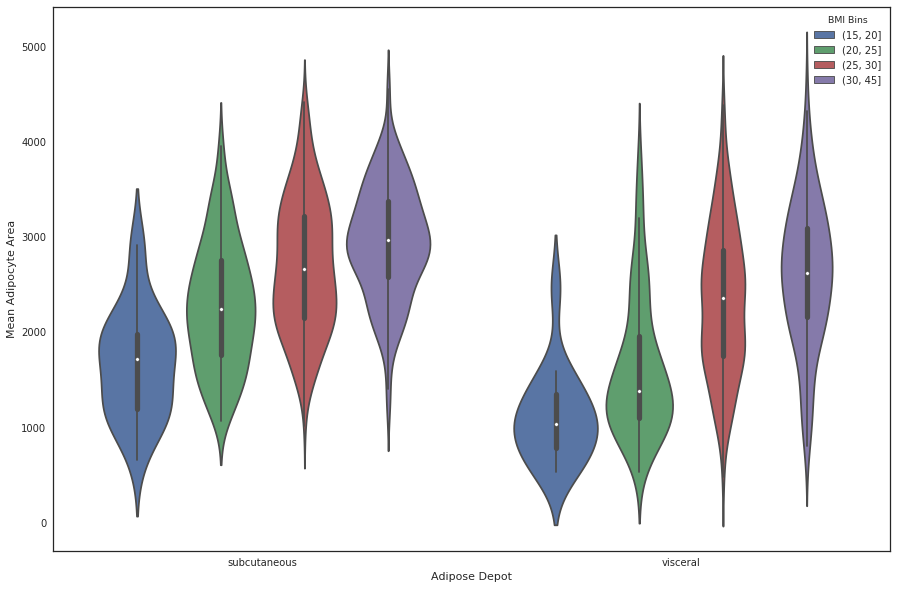

In [34]:
# by depot and sex
fig = plt.figure(figsize=(15,10))
ax.grid(b="off")
ax=sns.violinplot(y='mu_area',x='depot',hue='BMI Bins',data=both_depot_pheno)
ax.set(xlabel="Adipose Depot", ylabel="Mean Adipocyte Area")



(0, 5622.51590331803)

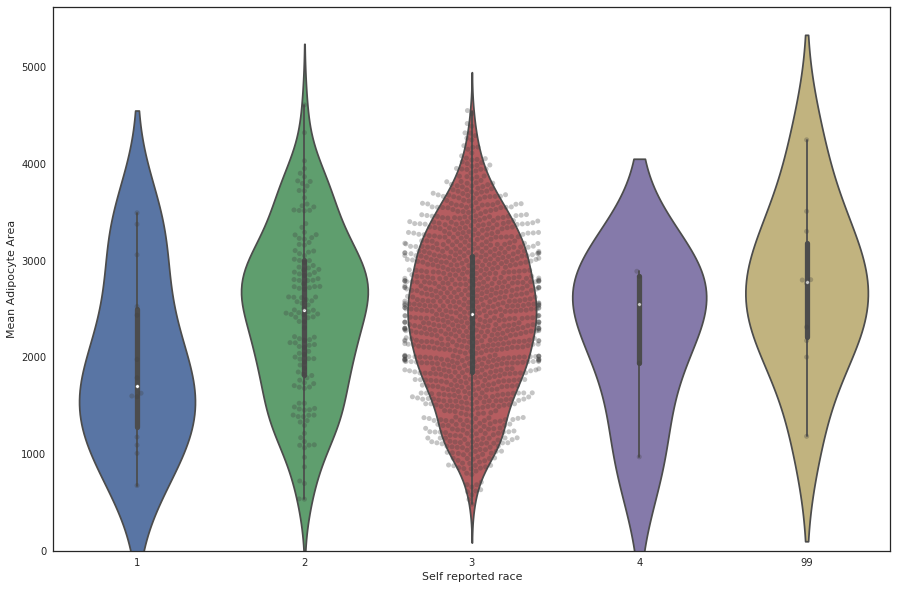

In [35]:
# By ethnicity.

fig = plt.figure(figsize=(15,10))
ax.grid(b="off")
ax=sns.violinplot(y='mu_area',x='RACE',data=both_depot_pheno)
ax=sns.swarmplot(y='mu_area',x='RACE',data=both_depot_pheno,color='.25',alpha=0.3)
ax.set(xlabel="Self reported race", ylabel="Mean Adipocyte Area")
sns.plt.ylim(0,)




In [36]:
tmp=both_depot_pheno[both_depot_pheno['RACE'] != 1]
tmp=both_depot_pheno[both_depot_pheno['RACE'] != 4]
tmp=both_depot_pheno[both_depot_pheno['RACE'] != 99]

In [37]:
tmp.groupby(['RACE']).count()

,Unnamed: 0,SUBJID,mu_area,var_area,per_small_cells,COHORT,sex,AGE,ETHNCTY,HGHT,...,MHUREMIA,MHWKNSSU,MHWNVCT,MHWNVHX,MHWTLSUA,MHWTLSUB,DTHSEASON,DTHTIME,depot,BMI Bins
RACE,,,,,,,,,,,,,,,,,,,,,
1,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,133,133,146,146
3,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,...,1105,1105,1105,1104,1105,1105,1103,1103,1105,1105
4,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


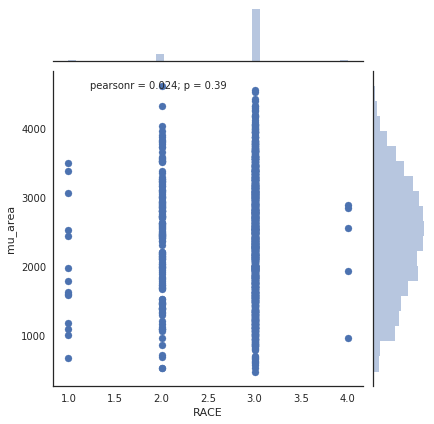

In [38]:
sns.jointplot('RACE','mu_area',data=tmp)

Lets load in the sample attributes such as Ischemic sample time.

In [39]:
attributes=pd.read_csv('../RNA_seq/GTEx_Analysis_2016-01-15_v7_SampleAttributesDS.txt',delimiter='\t')

In [40]:
attributes['SUBJID']=[v.split('-')[0]+'-'+v.split('-')[1] for v in attributes['SAMPID'].tolist()]

In [41]:
attributes=attributes[attributes['SMTS'] == 'Adipose Tissue']

In [42]:
# Merge both subq and visceral tables with sample attributes to check relationship with
# sample ischemic time.

visc_attrib=pd.merge(visc_pheno_merged,attributes,left_on='SUBJID', right_on='SUBJID')
visc_attrib=visc_attrib.drop_duplicates(['SUBJID'])

subq_attrib=pd.merge(subq_pheno_merged,attributes,left_on='SUBJID', right_on='SUBJID')
subq_attrib=subq_attrib.drop_duplicates(['SUBJID'])

In [43]:
pearsonr(visc_attrib['mu_area'],visc_attrib['SMTSISCH'])


(0.1347505386636936, 0.0039822468154601534)

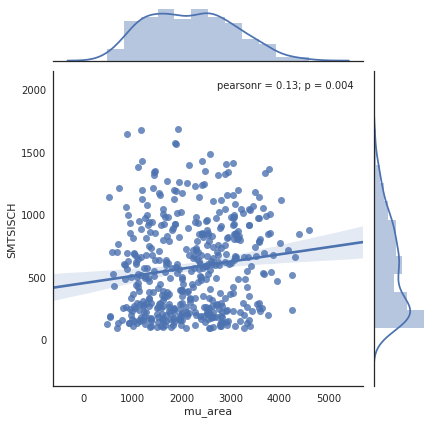

In [44]:
sns.jointplot(visc_attrib['mu_area'],visc_attrib['SMTSISCH'],kind="reg")

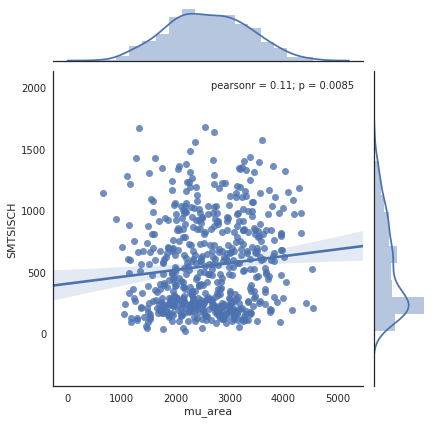

In [45]:
sns.jointplot(subq_attrib['mu_area'],subq_attrib['SMTSISCH'],kind="reg")

In [46]:
subq_attrib.COHORT.replace(['Postmortem', 'Organ Donor (OPO)','Surgical'],[1,2,3], inplace=True)


In [48]:
phenotypes['COHORT'][1:10]

In [49]:
visc_attrib.COHORT.replace(['Postmortem', 'Organ Donor (OPO)'],[1,2], inplace=True)


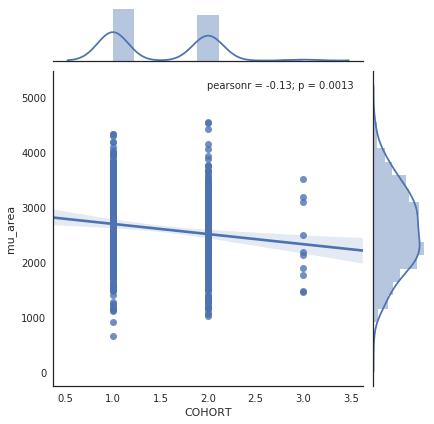

In [50]:
sns.jointplot(subq_attrib['COHORT'],subq_attrib['mu_area'],kind="reg")

Seems to be a "cohort" effect - whether the individual was an organ donor vs post-mortem collection

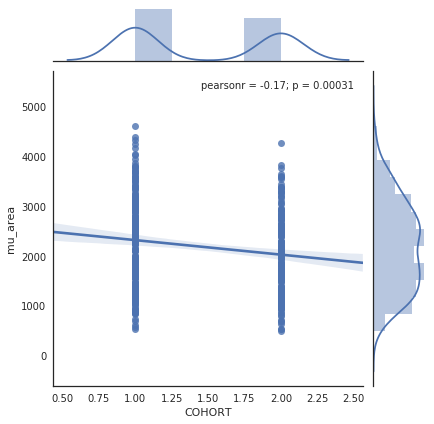

In [51]:
sns.jointplot(visc_attrib['COHORT'],visc_attrib['mu_area'],kind="reg")

What do the adipocyte variances look like?

In [55]:


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.distplot(np.array(subq_sample_area_df['var_area'].tolist()),color='cadetblue',bins=30)
plt.title('Subcutaneous',size=20)
ax.set(xlabel="Adipocyte area variance")

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.distplot(np.array(visc_sample_area_df['var_area'].tolist()),color='steelblue',bins=30)
plt.title('Visceral',size=20)
ax.set(xlabel="Adipocyte area variance")


In [122]:
subq_pheno_merged.to_csv('GTEx_Subcutaneous_areas.csv')
len(subq_pheno_merged)

715

In [123]:
visc_pheno_merged.to_csv('GTEx_Visceral_areas.csv')
len(visc_pheno_merged)

562

In [124]:
both_depot_pheno.to_csv('GTEx_BothDepots_areas.csv')

Two subjects with the lowest and highest adipocyte area variance:

In [125]:
visc_pheno_merged['SUBJID'][np.argmin(visc_pheno_merged['var_area'])],visc_pheno_merged['SUBJID'][np.argmax(visc_pheno_merged['var_area'])]

('GTEX-1339X', 'GTEX-117YW')

Two subjects with the lowest and highest adipocyte area mean:

In [126]:
visc_pheno_merged['SUBJID'][np.argmin(visc_pheno_merged['mu_area'])],visc_pheno_merged['SUBJID'][np.argmax(visc_pheno_merged['mu_area'])]

('GTEX-1339X', 'GTEX-117YW')

In [127]:
min_var = []
for i in visceral_seg_masks_filt:
    gtex_id = i.split('_')[4]
    if gtex_id == visc_pheno_merged['SUBJID'][np.argmin(visc_pheno_merged['var_area'])]:
        print(i)
        min_var.append(i)
        

predicted_masks/GTEX/Pred_Mask_10240-15360_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_11264-15360_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_12288-12288_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_12288-17408_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_13312-12288_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_13312-14336_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_13312-15360_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_13312-18432_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_13312-22528_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_16384-11264_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_17408-17408_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_18432-10240_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_18432-18432_GTEX-1339X_Visceral-Omentum.png
predicted_masks/GTEX/Pred

In [128]:
max_var = []
for i in visceral_seg_masks_filt:
    gtex_id = i.split('_')[4]
    if gtex_id == visc_pheno_merged['SUBJID'][np.argmax(visc_pheno_merged['var_area'])]:
        print(i)
        max_var.append(i)
        

predicted_masks/GTEX/Pred_Mask_10240-10240_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-11264_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-12288_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-13312_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-14336_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-15360_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-16384_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-17408_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-18432_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-19456_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-22528_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-23552_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_10240-24576_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred

predicted_masks/GTEX/Pred_Mask_14336-9216_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-10240_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-11264_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-12288_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-13312_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-14336_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-15360_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-16384_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-17408_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-18432_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-19456_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-20480_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_15360-21504_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_

predicted_masks/GTEX/Pred_Mask_40960-17408_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-18432_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-19456_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-20480_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-21504_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-24576_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-5120_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-6144_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-7168_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-8192_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_40960-9216_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_41984-10240_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_41984-11264_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask

predicted_masks/GTEX/Pred_Mask_48128-12288_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-13312_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-14336_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-15360_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-16384_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-17408_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-18432_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-19456_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-20480_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-21504_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-22528_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-23552_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_48128-24576_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred

predicted_masks/GTEX/Pred_Mask_6144-15360_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-16384_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-17408_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-18432_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-19456_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-20480_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-21504_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-22528_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-23552_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-24576_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-25600_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-26624_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-27648_GTEX-117YW_Visceral-Omentum.png
predicted_masks/GTEX/Pred_Mask_6144-28

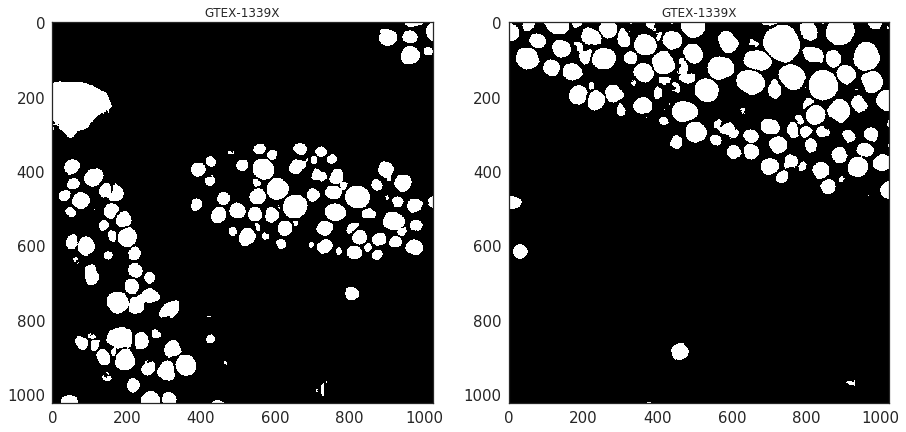

In [129]:
plot_me(min_var[0:2],x=1,y=2)

**Whilst there are joined cells it doesn't matter because:**
1. We are dealing with averages
2. That average is computed after filtering out all cells over 15000um^2

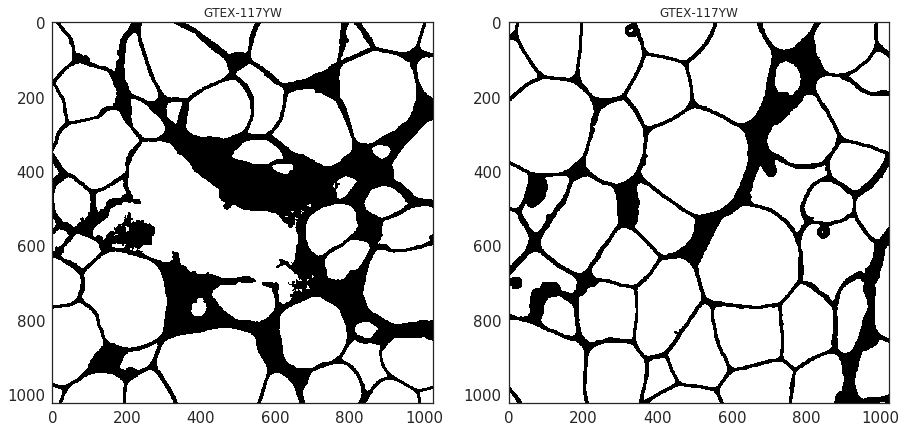

In [130]:
plot_me(max_var[0:2],x=1,y=2)

In [ ]:
min_mean = []
for i in visceral_seg_masks_filt:
    gtex_id = i.split('_')[4]
    if gtex_id == visc_pheno_merged['SUBJID'][np.argmin(visc_pheno_merged['mu_area'])]:
        min_mean.append(i)
        

In [ ]:
max_mean = []
for i in visceral_seg_masks_filt:
    gtex_id = i.split('_')[4]
    if gtex_id == visc_pheno_merged['SUBJID'][np.argmax(visc_pheno_merged['mu_area'])]:
        max_mean.append(i)
        

In [ ]:
plot_me(min_mean[0:2],x=1,y=2)

In [ ]:
plot_me(max_mean[0:2],x=1,y=2)

Unpublished work elsewhere has shown a relationship between KLF14 (rs4731702-T) and adipocyte size.
However, that study only used n=14 for both homozygote classes. We will see whether it holds in GTEx data given
we now have established the robustness of our estimates and their relationship to whole body traits.

In [117]:
both_depot_pheno = pd.read_csv('GTEx_BothDepots_areas.csv')
klf14_genotype = pd.read_csv('/Users/craig/Downloads/GTEx_Analysis_2016-01-15_v7_WholeGenomeSeq.7_130433384_C_T_b37.rs4731702.genotypes.raw',delimiter=" ")

In [118]:
klf14_genotype.columns = ['SUBJID','IID','PAT','MAT','SEX','PHENOTYPE','rs4731702']
klf14_genotype.head()

,SUBJID,IID,PAT,MAT,SEX,PHENOTYPE,rs4731702
0,GTEX-1117F,GTEX-1117F,0,0,0,-9,0.0
1,GTEX-111CU,GTEX-111CU,0,0,0,-9,1.0
2,GTEX-111FC,GTEX-111FC,0,0,0,-9,1.0
3,GTEX-111VG,GTEX-111VG,0,0,0,-9,0.0
4,GTEX-111YS,GTEX-111YS,0,0,0,-9,1.0


In [119]:
subq_pheno_merged=pd.read_csv('GTEx_Subcutaneous_areas.csv')


In [120]:
both_depot_pheno_genotyped=pd.merge(both_depot_pheno,klf14_genotype,left_on='SUBJID', right_on='SUBJID')
both_depot_pheno_genotyped.head()

,Unnamed: 0,SUBJID,mu_area,var_area,per_small_cells,COHORT,sex,AGE,RACE,ETHNCTY,...,DTHSEASON,DTHTIME,depot,BMI Bins,IID,PAT,MAT,SEX,PHENOTYPE,rs4731702
0,0,GTEX-1117F,2935.71432,8.081680e+06,0.264,Postmortem,XX,66,2,0,...,Spring,20:20,subcutaneous,"(30, 45]",GTEX-1117F,0,0,0,-9,0.0
1,1,GTEX-111CU,6453.84267,2.421207e+07,0.120,Organ Donor (OPO),XY,57,3,0,...,Spring,08:01,subcutaneous,"(30, 45]",GTEX-111CU,0,0,0,-9,1.0
2,0,GTEX-111CU,6403.98528,2.213604e+07,0.114,Organ Donor (OPO),XY,57,3,0,...,Spring,08:01,visceral,"(30, 45]",GTEX-111CU,0,0,0,-9,1.0
3,2,GTEX-111FC,5250.54915,1.949411e+07,0.168,Postmortem,XY,61,3,0,...,Spring,12:30,subcutaneous,"(25, 30]",GTEX-111FC,0,0,0,-9,1.0
4,3,GTEX-111VG,7211.55798,2.973650e+07,0.120,Postmortem,XY,63,3,0,...,Spring,07:13,subcutaneous,"(25, 30]",GTEX-111VG,0,0,0,-9,0.0


Lets check KLF14 genotype across depots for association with mean adipocyte area.

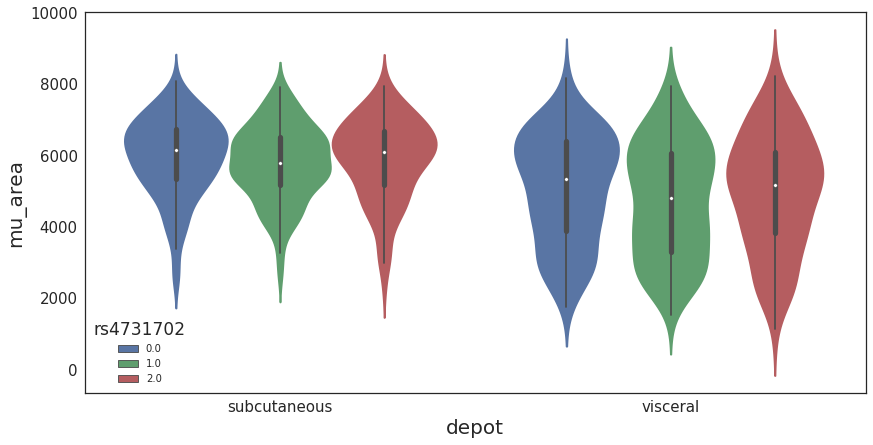

In [121]:
fig = plt.figure(figsize=(14,7))

ax=sns.violinplot(y='mu_area',x='depot',hue='rs4731702',data=both_depot_pheno_genotyped)

Lets just look at just white women and subQ fat:

In [122]:
female_only=both_depot_pheno_genotyped[both_depot_pheno_genotyped['sex'] == "XX"]
female_only_subq = female_only[female_only['depot'] == 'subcutaneous']
female_only_subq = female_only_subq[female_only_subq['RACE'] == 3]


[<matplotlib.text.Text at 0x14b2822e8>, <matplotlib.text.Text at 0x14a4d89e8>]

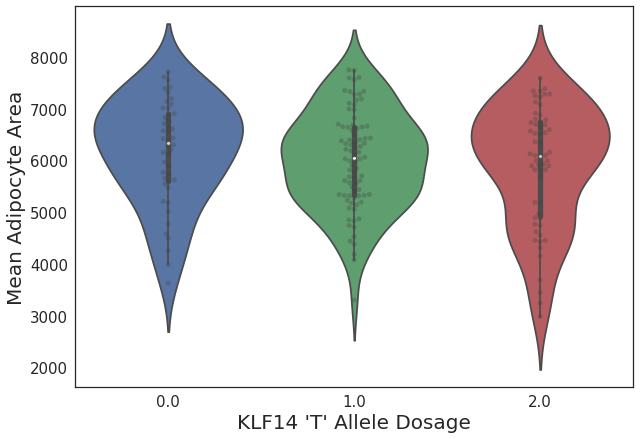

In [123]:
fig = plt.figure(figsize=(10,7))

ax=sns.violinplot(y='mu_area',x='rs4731702',data=female_only_subq)
ax = sns.swarmplot(y='mu_area',x='rs4731702',data=female_only_subq, color=".25",alpha=.3)
ax.set(xlabel="KLF14 'T' Allele Dosage", ylabel="Mean Adipocyte Area")



In [124]:
print('No correlation in n = {} female subcutaneous samples'.format(len(female_only_subq)))

No correlation in n = 189 female subcutaneous samples


In [128]:
pearsonr(female_only_subq['mu_area'],female_only_subq['rs4731702'])

(-0.099344728114717701, 0.17380754508083013)

Lets check just males:

In [129]:
male_only=both_depot_pheno_genotyped[both_depot_pheno_genotyped['sex'] == 'XY']
male_only_subq = male_only[male_only['depot'] == 'subcutaneous']
male_only_subq = male_only_subq[male_only_subq['RACE'] == 3]



[<matplotlib.text.Text at 0x14b39ee80>, <matplotlib.text.Text at 0x14a50ecf8>]

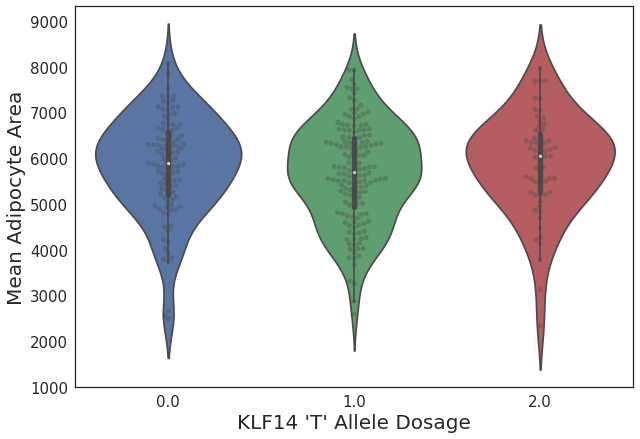

In [130]:
fig = plt.figure(figsize=(10,7))

ax=sns.violinplot(y='mu_area',x='rs4731702',data=male_only_subq)
ax = sns.swarmplot(y='mu_area',x='rs4731702',data=male_only_subq, color=".25",alpha=.3)
ax.set(xlabel="KLF14 'T' Allele Dosage", ylabel="Mean Adipocyte Area")


KLF14 is not associated to adipocyte area in subcutaneous fat from white females.
Adjusting for both BMI and AGE does not change this

(-1, 3)

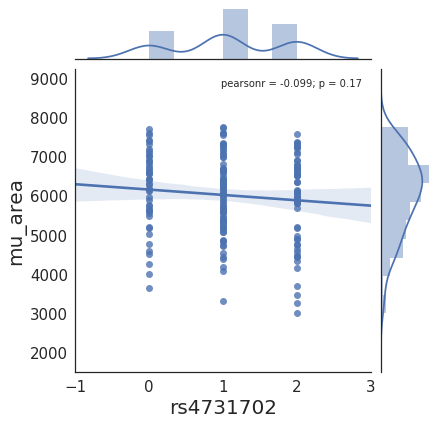

In [133]:
sns.jointplot('rs4731702','mu_area',data=female_only_subq,kind="reg")
sns.plt.xlim(-1,3)


In [136]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X=female_only_subq[['rs4731702','BMI','AGE']]
X2 = sm.add_constant(X)

est = sm.OLS(female_only_subq['mu_area'], X2)
est2 = est.fit()
est2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mu_area   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     21.45
Date:                Sat, 23 Sep 2017   Prob (F-statistic):           5.75e-12
Time:                        20:29:54   Log-Likelihood:                -1550.2
No. Observations:                 189   AIC:                             3108.
Df Residuals:                     185   BIC:                             3121.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2279.3381    505.821      4.506      0.000    1281.418    3277.258
rs4731702    -15.2095     89.114     -0.171      0.865    -191.020     160.601
BMI           98.5226     15.297      6.440      0.000      68.343     128.702
AGE           20.2920      5.050      4.018      0.000      10.330      30.254
==============================================================================
Omnibus:                       12.669   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.443
Skew:                          -0.646   Prob(JB):                      0.00121
Kurtosis:                       3.195   Cond. No.                         475.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
both_depot_pheno.loc[both_depot_pheno['MHT2D'].abs() > 2, 'MHT2D' ] = np.NaN
subq_pheno_merged.loc[subq_pheno_merged['MHT2D'].abs() > 2, 'MHT2D' ] = np.NaN
visc_pheno_merged.loc[visc_pheno_merged['MHT2D'].abs() > 2, 'MHT2D' ] = np.NaN



In [164]:
subq_pheno_merged.MHT2D.replace([0, 1], ['case', 'T2D'], inplace=True)
visc_pheno_merged.MHT2D.replace([0, 1], ['case', 'T2D'], inplace=True)

subq_pheno_merged.SEX.replace([1, 2], ['XY', 'XX'], inplace=True)
visc_pheno_merged.SEX.replace([1, 2], ['XY', 'XX'], inplace=True)




(0, 12000)

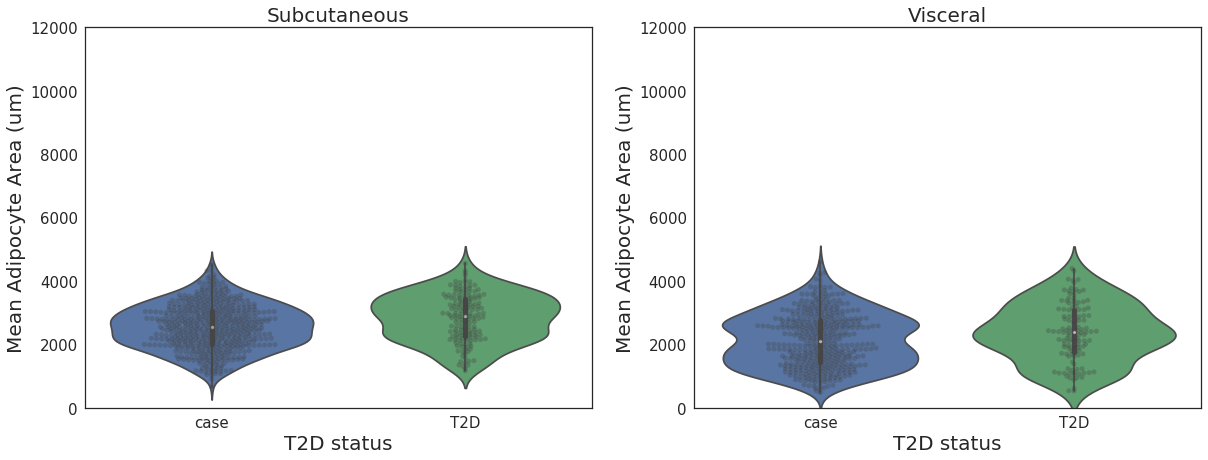

In [165]:
#MHT2D

fig = plt.figure(figsize=(20,7))
#MHT2D
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.violinplot(y='mu_area',x='MHT2D',data=subq_pheno_merged)
sns.swarmplot(y='mu_area',x='MHT2D',data=subq_pheno_merged,color=".25",alpha=.3)
plt.title('Subcutaneous',size=20)
ax.set(xlabel="T2D status", ylabel="Mean Adipocyte Area (um)")
sns.plt.ylim(0,12000)

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.violinplot(y='mu_area',x='MHT2D',data=visc_pheno_merged)
sns.swarmplot(y='mu_area',x='MHT2D',data=visc_pheno_merged,color=".25",alpha=.3)
plt.title('Visceral',size=20)
ax.set(xlabel="T2D status", ylabel="Mean Adipocyte Area (um)")
sns.plt.ylim(0,12000)


In [166]:
T2D = subq_pheno_merged[subq_pheno_merged['MHT2D'] =='T2D']
case = subq_pheno_merged[subq_pheno_merged['MHT2D'] =='case']

T2D_visc = visc_pheno_merged[visc_pheno_merged['MHT2D'] =='T2D']
case_visc = visc_pheno_merged[visc_pheno_merged['MHT2D'] =='case']

Statistically significant difference between mean adipocyte area in SubQ and visceral for T2D

In [167]:
ttest(T2D['mu_area'],case['mu_area'])

Ttest_indResult(statistic=4.330578379648721, pvalue=1.7006405105861345e-05)

In [168]:
ttest(T2D_visc['mu_area'],case_visc['mu_area'])

Ttest_indResult(statistic=2.6460138772582726, pvalue=0.008373998626372517)

In [169]:
subq_pheno_merged.MHT2D.replace( ['case', 'T2D'],[0, 1], inplace=True)
visc_pheno_merged.MHT2D.replace(['case', 'T2D'], [0, 1], inplace=True)


In [170]:
X=visc_pheno_merged[['BMI','AGE']]
X2 = sm.add_constant(X)

est = sm.OLS(visc_pheno_merged['mu_area'], X2)
est2 = est.fit()
[est2.pvalues]

[const    2.714871e-07
 BMI      9.514130e-37
 AGE      1.880862e-05
 dtype: float64]

In [171]:
X=subq_pheno_merged[['BMI','AGE']]
X2 = sm.add_constant(X)

est = sm.OLS(subq_pheno_merged['mu_area'], X2)
est_subq = est.fit()
[est_subq.pvalues]

[const    6.634936e-01
 BMI      7.593213e-32
 AGE      9.797499e-08
 dtype: float64]

Text(0.5, 1.0, 'BMI Adjusted')

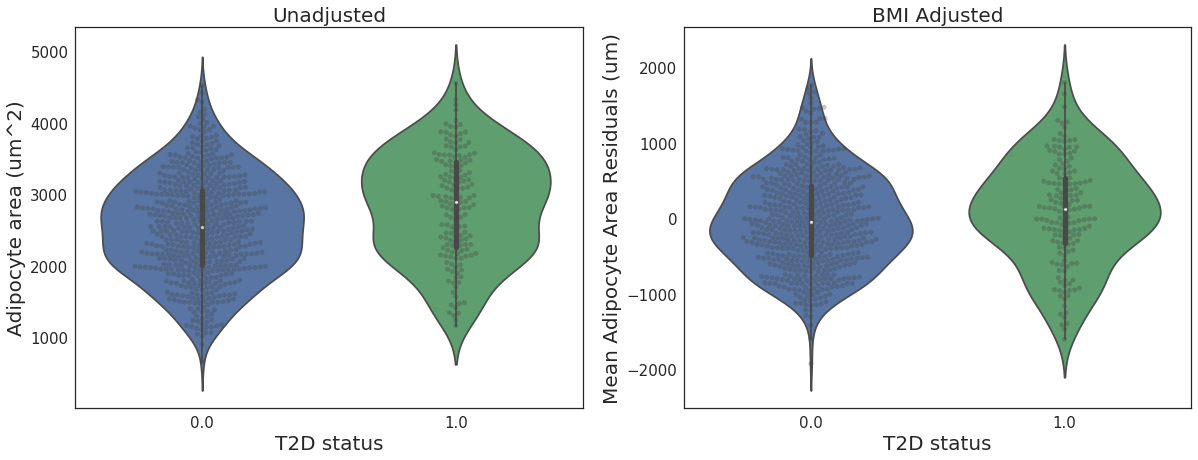

In [172]:
#MHT2D
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.violinplot(subq_pheno_merged['MHT2D'],subq_pheno_merged['mu_area'])
sns.swarmplot(subq_pheno_merged['MHT2D'],subq_pheno_merged['mu_area'],color='.25',alpha=0.3)
ax.set(ylabel="Adipocyte area (um^2)", xlabel="T2D status")
plt.title('Unadjusted',size=20)

# sns.plt.ylim(0,12000)

ax = fig.add_subplot(1,2,2)
subq_pheno_merged['Adipocyte residuals (BMIadj)'] = est_subq.resid
ax.grid(b="off")
sns.violinplot(subq_pheno_merged['MHT2D'],subq_pheno_merged['Adipocyte residuals (BMIadj)'])
sns.swarmplot(subq_pheno_merged['MHT2D'],subq_pheno_merged['Adipocyte residuals (BMIadj)'],color='.25',alpha=0.3)
ax.set(xlabel="T2D status", ylabel="Mean Adipocyte Area Residuals (um)")
plt.title('BMI Adjusted',size=20)
# sns.plt.ylim(0,12000)



In [173]:
T2D = subq_pheno_merged[subq_pheno_merged['MHT2D'] ==1]
case = subq_pheno_merged[subq_pheno_merged['MHT2D'] ==0]


Is there a significant difference when BMI and age are adjusted for? (No)

In [174]:
ttest(T2D['Adipocyte residuals (BMIadj)'],case['Adipocyte residuals (BMIadj)'])

Ttest_indResult(statistic=1.5997841663642667, pvalue=0.11009008004741794)

In [175]:
len(subq_pheno_merged),len(visc_pheno_merged),len(both_depot_pheno)

(717, 563, 1280)

In [176]:
both_depot_pheno.depot.replace( ['subcutaneous', 'visceral'],[0, 1], inplace=True)


In [177]:
both_depot_pheno.sex.replace(['XY', 'XX'],[1, 2], inplace=True)


In [178]:
X=both_depot_pheno[['AGE','BMI','sex','depot','RACE']]
X2 = sm.add_constant(X)

est = sm.OLS(both_depot_pheno['var_area'], X2)
est2 = est.fit()
[est2.pvalues]

[const    8.454444e-01
 AGE      2.616282e-07
 BMI      3.493280e-57
 sex      9.030385e-01
 depot    6.344996e-58
 RACE     2.912336e-01
 dtype: float64]

In [179]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               var_area   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     118.8
Date:                Tue, 27 Nov 2018   Prob (F-statistic):          2.84e-103
Time:                        21:49:51   Log-Likelihood:                -10203.
No. Observations:                1280   AIC:                         2.042e+04
Df Residuals:                    1274   BIC:                         2.045e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7347    167.893      0.195      0.845    -296.642     362.111
AGE            8.2168      1.587      5.177      0.000       5.103      11.330
BMI           81.8679      4.882     16.769      0.000      72.290      91.446
sex            5.0599     41.526      0.122      0.903     -76.407      86.527
depot       -668.6808     39.584    -16.893      0.000    -746.338    -591.023
RACE           2.4489      2.319      1.056      0.291      -2.101       6.999
==============================================================================
Omnibus:                       18.294   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.865
Skew:                           0.297   Prob(JB):                     8.01e-05
Kurtosis:                       2.983   Cond. No.                         527.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
subq_pheno_merged.SEX.replace(['XY', 'XX'],[1, 2], inplace=True)


In [181]:
X=subq_pheno_merged[['AGE','BMI','SEX','RACE']]
X2 = sm.add_constant(X)

est = sm.OLS(subq_pheno_merged['mu_area'], X2)
est2 = est.fit()
[est2.pvalues]

[const    1.316674e-01
 AGE      4.560053e-08
 BMI      7.647009e-34
 SEX      2.767161e-06
 RACE     4.823731e-01
 dtype: float64]

In [182]:
visc_pheno_merged.SEX.replace(['XY', 'XX'],[1, 2], inplace=True)



In [183]:
X=visc_pheno_merged[['AGE','BMI','SEX','RACE']]
X2 = sm.add_constant(X)

est = sm.OLS(visc_pheno_merged['mu_area'], X2)
est2 = est.fit()
[est2.pvalues]

[const    1.298622e-03
 AGE      2.191862e-05
 BMI      2.345129e-36
 SEX      1.097374e-05
 RACE     2.307741e-01
 dtype: float64]

In [184]:
both_depot_pheno_tmp=both_depot_pheno.drop_duplicates(['SUBJID'])

In [185]:
pearsonr(both_depot_pheno_tmp['BMI'],both_depot_pheno_tmp['mu_area'])

(0.4312038957336629, 2.5290903385156338e-34)

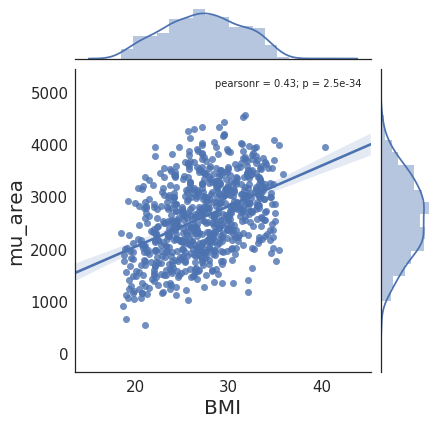

In [186]:
sns.jointplot(both_depot_pheno_tmp['BMI'],both_depot_pheno_tmp['mu_area'],kind="reg")

In [187]:
#Last check before sending to sara:
subq= pd.read_csv('GTEx_Subcutaneous_areas.csv')
len(subq)

717

In [188]:
visc = pd.read_csv('GTEx_Visceral_areas.csv')
len(visc)

563

In [189]:
both = pd.read_csv('GTEx_BothDepots_areas.csv')

In [190]:
both['BMI'].min(),both['BMI'].max(),both['BMI'].mean()

(18.46, 40.35, 27.403804687499964)

In [191]:
both.groupby(['MHT2D']).count()

,Unnamed: 0,SUBJID,mu_area,var_area,per_small_cells,COHORT,sex,AGE,RACE,ETHNCTY,...,MHUREMIA,MHWKNSSU,MHWNVCT,MHWNVHX,MHWTLSUA,MHWTLSUB,DTHSEASON,DTHTIME,depot,BMI Bins
MHT2D,,,,,,,,,,,,,,,,,,,,,
0,992,992,992,992,992,992,992,992,992,992,...,992,992,992,991,992,992,986,986,992,992
1,283,283,283,283,283,283,283,283,283,283,...,283,283,283,283,283,283,274,274,283,283
99,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [192]:
both['AGE'].min(),both['AGE'].max(),both['AGE'].mean()

(20, 70, 53.421875)

In [193]:
sum(both_depot_pheno.groupby(['SUBJID']).count()['mu_area'] == 2)

552

In [194]:
len(set(visc_pheno_merged['SUBJID'].tolist()).intersection(subq_pheno_merged['SUBJID'].tolist()))

552

In [195]:
visc_pheno_merged[visc_pheno_merged['per_small_cells'] > 0.5]

,SUBJID,mu_area,var_area,per_small_cells,COHORT,SEX,AGE,RACE,ETHNCTY,HGHT,...,MHUK8096,MHUREMIA,MHWKNSSU,MHWNVCT,MHWNVHX,MHWTLSUA,MHWTLSUB,DTHSEASON,DTHTIME,depot
5,GTEX-1128S,3074.819465,2689.564619,0.527950,Postmortem,2,66,3,0,66.0,...,0,0,0,0,0.0,0,0,Spring,09:45,visceral
20,GTEX-11EQ8,3948.601947,3395.560694,0.516129,Postmortem,1,69,3,99,72.0,...,0,0,0,0,0.0,0,0,Spring,21:45,visceral
27,GTEX-11LCK,3767.112418,3603.022668,0.536232,Organ Donor (OPO),1,38,3,0,71.0,...,0,0,0,0,0.0,0,0,Spring,12:26,visceral
37,GTEX-11PRG,3105.295427,2778.104952,0.531034,Postmortem,1,54,2,99,70.0,...,0,0,0,0,0.0,0,0,Summer,12:16,visceral
44,GTEX-11WQK,2570.972304,1833.636364,0.536145,Postmortem,1,55,3,0,68.0,...,0,0,0,0,0.0,0,0,Summer,07:26,visceral
59,GTEX-12WS9,2409.637423,2124.572136,0.556338,Postmortem,2,59,3,99,65.0,...,0,0,0,0,0.0,0,0,Summer,03:45,visceral
70,GTEX-12WSL,3384.600529,2981.614097,0.527950,Organ Donor (OPO),1,51,3,0,72.0,...,0,0,0,0,0.0,0,0,Summer,06:32,visceral
84,GTEX-131XH,2814.873787,2416.201509,0.531250,Postmortem,1,53,2,0,74.0,...,0,0,0,0,0.0,0,0,Summer,06:02,visceral
122,GTEX-13G51,1647.593297,1312.546541,0.515625,Postmortem,1,69,3,0,71.0,...,0,0,0,0,0.0,0,0,Fall,06:45,visceral
143,GTEX-13OVH,2370.262564,1899.012375,0.519084,Postmortem,1,70,3,99,72.0,...,0,0,0,0,0.0,0,0,Fall,22:26,visceral


In [8]:
import pandas as pd
both_depot_pheno = pd.read_csv('GTEx_BothDepots_areas.csv')
fto_snp = pd.read_csv('/Users/craig/Downloads/GTEx_Analysis_2016-01-15_v7_WholeGenomeSeq.16_53800954_T_C_b37.rs1421085.genotypes.raw',delimiter=" ")

In [10]:
fto_snp.columns = ['SUBJID','IID','PAT','MAT','SEX','PHENOTYPE','rs1421085']
fto_snp.head()

,SUBJID,IID,PAT,MAT,SEX,PHENOTYPE,rs1421085
0,GTEX-1117F,GTEX-1117F,0,0,2,-9,0
1,GTEX-111CU,GTEX-111CU,0,0,1,-9,1
2,GTEX-111FC,GTEX-111FC,0,0,1,-9,1
3,GTEX-111VG,GTEX-111VG,0,0,1,-9,0
4,GTEX-111YS,GTEX-111YS,0,0,1,-9,0


In [11]:
both_depot_pheno_genotyped=pd.merge(both_depot_pheno,fto_snp,left_on='SUBJID', right_on='SUBJID')

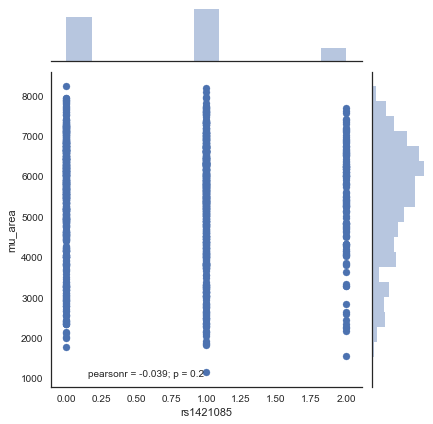

In [16]:
sns.jointplot(both_depot_pheno_genotyped['rs1421085'],both_depot_pheno_genotyped['mu_area'])

In [33]:
subq_geno = both_depot_pheno_genotyped[both_depot_pheno_genotyped['depot'] =='visceral']

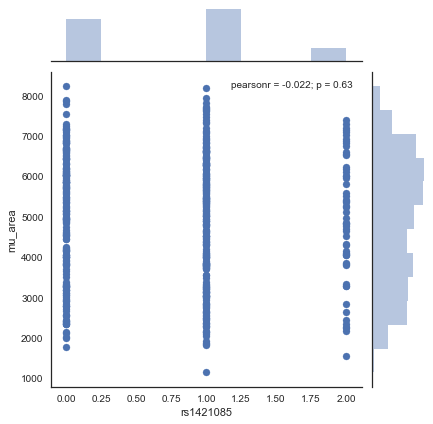

In [34]:
sns.jointplot(subq_geno['rs1421085'],subq_geno['mu_area'])

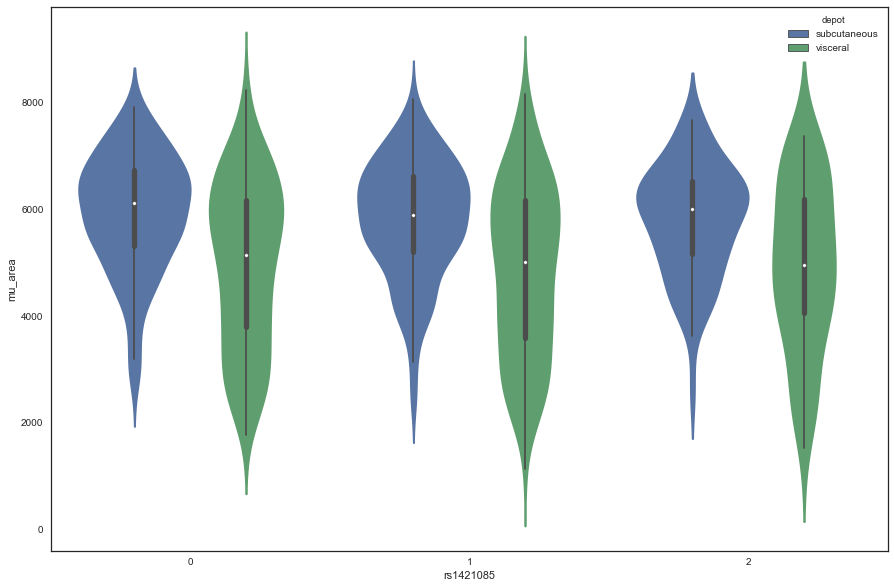

In [28]:
plt.figure(figsize=(15,10))
sns.violinplot(x='rs1421085',y='mu_area',data=both_depot_pheno_genotyped,hue='depot')

In [35]:
ethnic = both_depot_pheno_genotyped[both_depot_pheno_genotyped['RACE'] == 3]

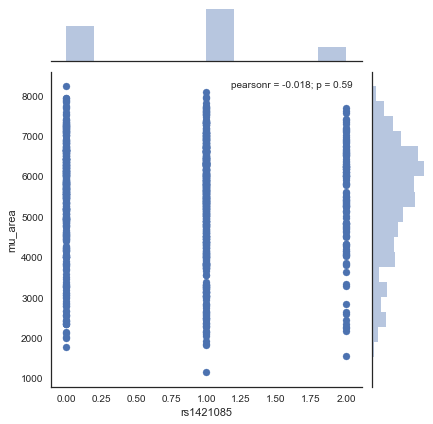

In [36]:
sns.jointplot(ethnic['rs1421085'],ethnic['mu_area'])

In [67]:
female_visc= both_depot_pheno_genotyped[both_depot_pheno_genotyped['depot'] ==1]
female_visc= female_visc[female_visc['sex'] =='XX']

In [74]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X=subq_geno[['rs1421085']]
X2 = sm.add_constant(X)

est = sm.OLS(subq_geno['per_small_cells'], X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        per_small_cells   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3962
Date:                Mon, 25 Sep 2017   Prob (F-statistic):              0.529
Time:                        14:39:44   Log-Likelihood:                 742.76
No. Observations:                 473   AIC:                            -1482.
Df Residuals:                     471   BIC:                            -1473.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1416      0.003     41.140      0.000       0.135       0.148
rs1421085      0.0022      0.003      0.629      0.529      -0.005       0.009
==============================================================================
Omnibus:                      253.675   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2357.524
Skew:                           2.143   Prob(JB):                         0.00
Kurtosis:                      13.062   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
subq_pheno_merged = pd.read_csv('final_cohort_measurements/GTEx_Subcutaneous_areas.csv')
visc_pheno_merged = pd.read_csv('final_cohort_measurements/GTEx_Visceral_areas.csv')

(0, 0.002)

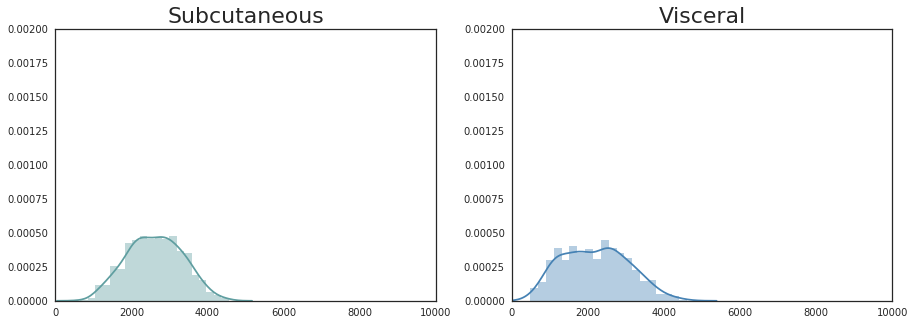

In [38]:

# GTEX

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.distplot(np.array(subq_pheno_merged['mu_area'].tolist()),color='cadetblue',bins=20)
plt.title('Subcutaneous',size=22)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.002)

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.distplot(np.array(visc_pheno_merged['mu_area'].tolist()),color='steelblue',bins=20)
plt.title('Visceral',size=22)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.002)



In [26]:
subq_pheno_merged = pd.read_csv('final_cohort_measurements/NDOG_Subq_areas.csv')
visc_pheno_merged = pd.read_csv('final_cohort_measurements/NDOG_Visceral_areas.csv')

(0, 0.002)

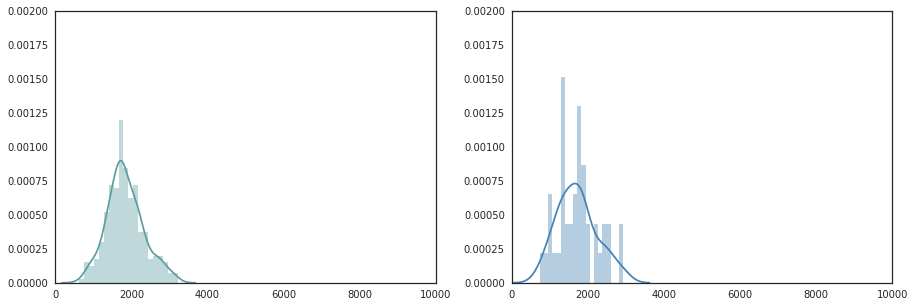

In [27]:

# NDOG

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.distplot(np.array(subq_pheno_merged['mu_area'].tolist()),color='cadetblue',bins=20)
# plt.title('Subcutaneous',size=16)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.002)

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.distplot(np.array(visc_pheno_merged['mu_area'].tolist()),color='steelblue',bins=20)
# plt.title('Visceral',size=16)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.002)



In [28]:
subq_pheno_merged = pd.read_csv('final_cohort_measurements/Julius_Subcutaneous_areas.csv')
visc_pheno_merged = pd.read_csv('final_cohort_measurements/Julius_Visceral_areas.csv')

(0, 0.002)

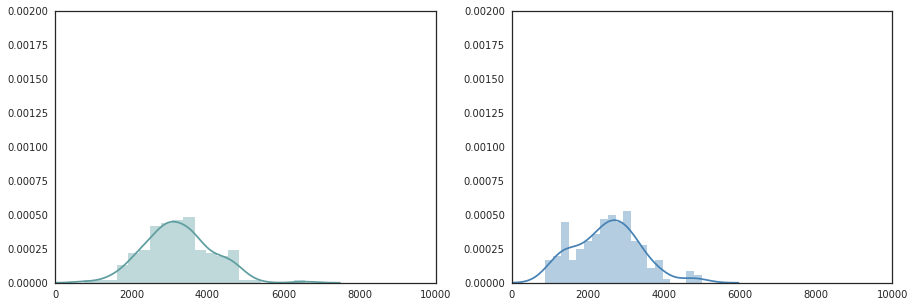

In [29]:

# MOBB

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.distplot(np.array(subq_pheno_merged['mu_area'].tolist()),color='cadetblue',bins=20)
# plt.title('Subcutaneous',size=16)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.002)

ax = fig.add_subplot(1,2,2)
ax.grid(b="off")
sns.distplot(np.array(visc_pheno_merged['mu_area'].tolist()),color='steelblue',bins=20)
# plt.title('Visceral',size=16)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.002)



In [30]:
subq_pheno_merged = pd.read_csv('final_cohort_measurements/Exeter_Subcutaneous_areas.csv')

(0, 0.002)

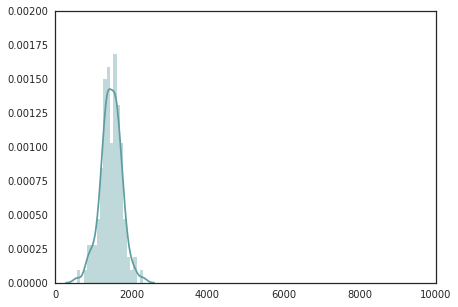

In [31]:

# MOBB

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
sns.distplot(np.array(subq_pheno_merged['mu_area'].tolist()),color='cadetblue',bins=20)
# plt.title('Subcutaneous',size=16)
sns.plt.xlim(0,10000)
sns.plt.ylim(0,0.002)
